In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [19]:
# Create your connection.
cnx = sqlite3.connect('C:/Users/pragupta/Desktop/Submission/Project_6/soccer/database.sqlite')

# cnx.execute('SELECT * FROM Player_Attributes')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
# df =pd.import_csv()


In [20]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [22]:
df["overall_rating"]

0         67.0
1         67.0
2         62.0
3         61.0
4         61.0
          ... 
183973    83.0
183974    78.0
183975    77.0
183976    78.0
183977    80.0
Name: overall_rating, Length: 183978, dtype: float64

In [23]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [25]:
df.shape

(183978, 42)

In [27]:
[(f"column {i+1} : {column}") for i,column in enumerate(df.columns)]

['column 1 : id',
 'column 2 : player_fifa_api_id',
 'column 3 : player_api_id',
 'column 4 : date',
 'column 5 : overall_rating',
 'column 6 : potential',
 'column 7 : preferred_foot',
 'column 8 : attacking_work_rate',
 'column 9 : defensive_work_rate',
 'column 10 : crossing',
 'column 11 : finishing',
 'column 12 : heading_accuracy',
 'column 13 : short_passing',
 'column 14 : volleys',
 'column 15 : dribbling',
 'column 16 : curve',
 'column 17 : free_kick_accuracy',
 'column 18 : long_passing',
 'column 19 : ball_control',
 'column 20 : acceleration',
 'column 21 : sprint_speed',
 'column 22 : agility',
 'column 23 : reactions',
 'column 24 : balance',
 'column 25 : shot_power',
 'column 26 : jumping',
 'column 27 : stamina',
 'column 28 : strength',
 'column 29 : long_shots',
 'column 30 : aggression',
 'column 31 : interceptions',
 'column 32 : positioning',
 'column 33 : vision',
 'column 34 : penalties',
 'column 35 : marking',
 'column 36 : standing_tackle',
 'column 37 : sl

In [28]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [29]:
df.drop(["id","player_fifa_api_id","player_api_id","date"],axis =1 ,inplace=True)

In [30]:
df.duplicated().any()

True

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(138440, 38)

In [33]:
df.isnull().sum()

overall_rating            1
potential                 1
preferred_foot            1
attacking_work_rate    1812
defensive_work_rate       1
crossing                  1
finishing                 1
heading_accuracy          1
short_passing             1
volleys                1482
dribbling                 1
curve                  1482
free_kick_accuracy        1
long_passing              1
ball_control              1
acceleration              1
sprint_speed              1
agility                1482
reactions                 1
balance                1482
shot_power                1
jumping                1482
stamina                   1
strength                  1
long_shots                1
aggression                1
interceptions             1
positioning               1
vision                 1482
penalties                 1
marking                   1
standing_tackle           1
sliding_tackle         1482
gk_diving                 1
gk_handling               1
gk_kicking          

In [38]:
def data_preprocessing(data):
#     data.convert_objects(convert_numeric=True)
    data.fillna(-99999, inplace=True)     
    return data

#call function to hanbdle missing data


In [39]:
data_preprocessing(df)

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [40]:
df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [41]:
df =pd.get_dummies(df)

In [42]:
df.head(5)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0
5,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,0,0,0,0,0,0,1,0,0,0
6,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df['overall_rating'].value_counts()

 68.0       8059
 69.0       7865
 67.0       7758
 70.0       7747
 72.0       7689
            ... 
 35.0          4
 37.0          2
 36.0          2
-99999.0       1
 33.0          1
Name: overall_rating, Length: 62, dtype: int64

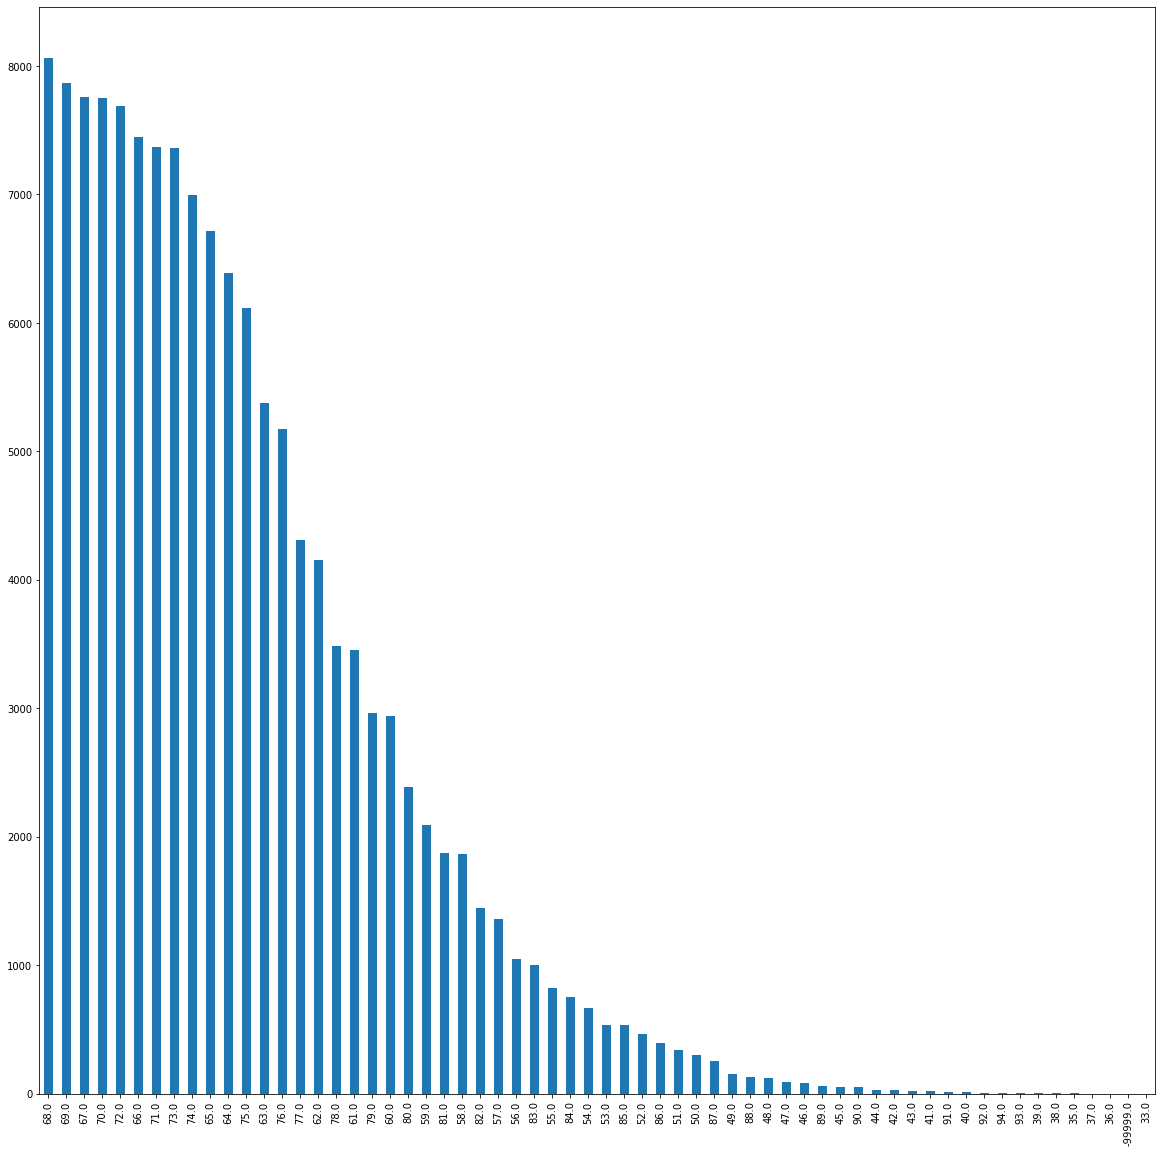

In [46]:
df['overall_rating'].value_counts().plot(kind='bar',figsize =(20,20))

In [48]:
df_x = df.drop(['overall_rating'], 1)
df_y = df['overall_rating']

In [49]:
df_x.head(3)

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
df_y.head(3)

0    67.0
2    62.0
3    61.0
Name: overall_rating, dtype: float64

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
import numpy as np

In [54]:
rfc_1 = RandomForestRegressor(random_state=10)
rfc_1.fit(df_x, df_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [59]:
feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc_1.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

In [61]:
feature_importances[:35]


,importance
feature,
reactions,0.2159
potential,0.1196
heading_accuracy,0.0665
standing_tackle,0.0587
ball_control,0.0534
strength,0.0439
marking,0.0435
interceptions,0.0328
penalties,0.0308


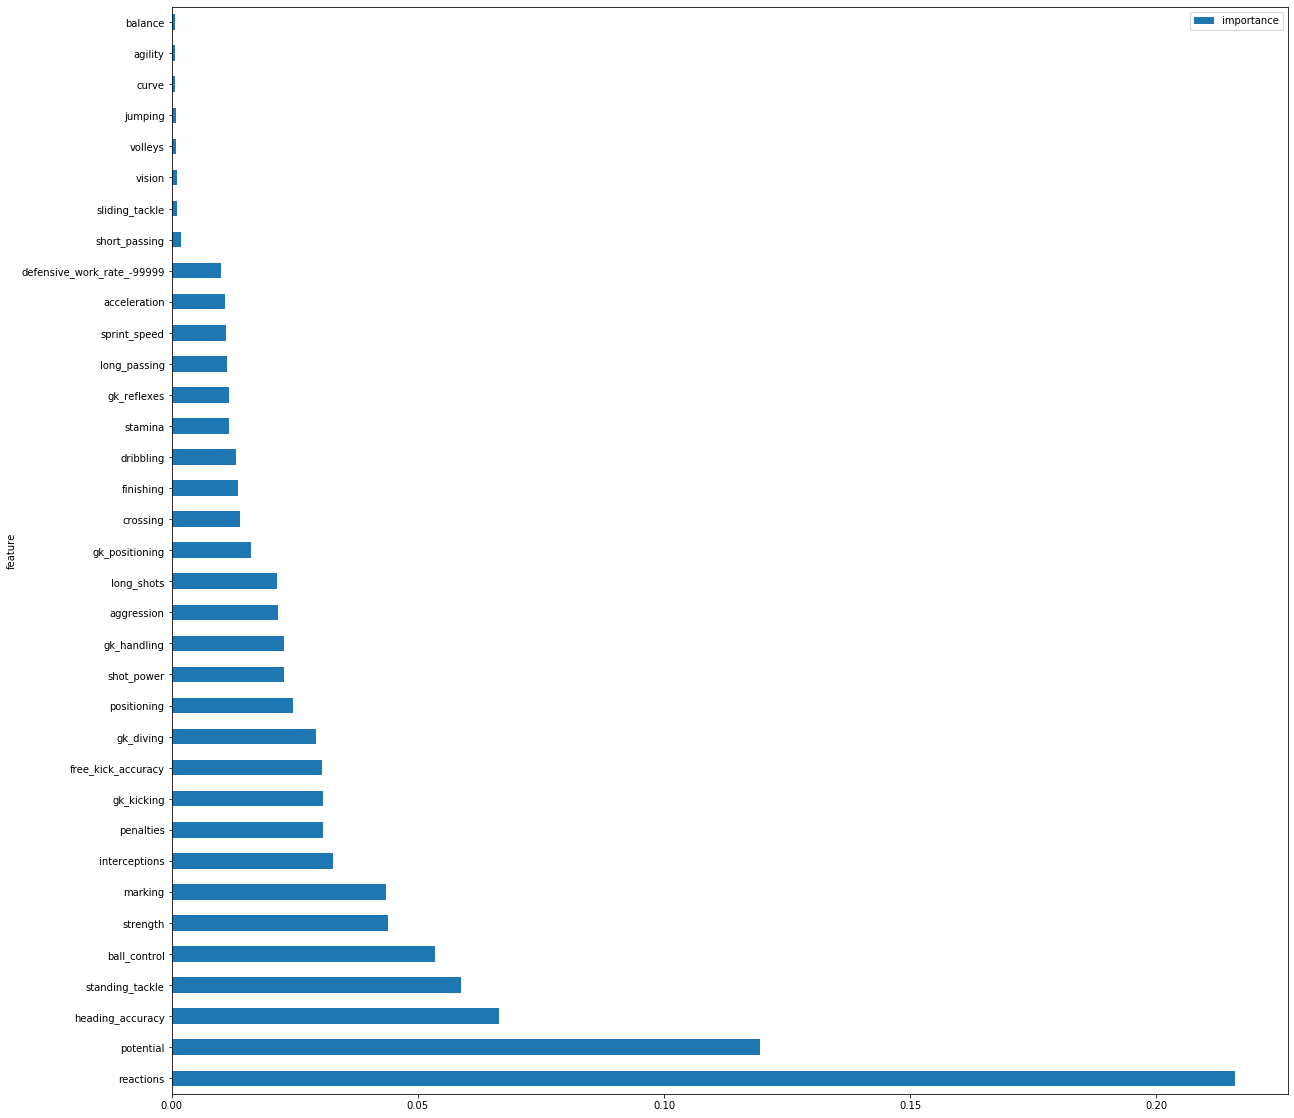

In [63]:
feature_importances[:35].plot(kind='barh',figsize=(20,20))

In [64]:
x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=0.2,train_size=0.8, random_state = 55)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.20,train_size =0.80, random_state = 55)

In [65]:

from sklearn.preprocessing import StandardScaler, Normalizer, scale
df_x1 = scale(x_train)

In [66]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
# on non-standardized data

pca = PCA(n_components=10).fit(x_train)

In [67]:
from sklearn.decomposition import PCA

# on non-standardized data
df_x2 = pca.transform(x_train)

In [68]:
pca.transform(x_test)


array([[-2.87192060e+03, -1.92067190e+01,  3.89076836e+01, ...,
         6.20015753e+00, -1.04074309e+01, -5.75286749e+00],
       [-2.89619899e+03, -6.34315217e+01,  5.30239844e+01, ...,
         1.31580415e+00,  1.38613492e+00,  5.49891879e+00],
       [-2.87306907e+03, -3.17066450e+01,  4.70829203e+00, ...,
         9.17749647e+00,  2.10751188e+01, -8.11423011e+00],
       ...,
       [-2.83820880e+03,  1.44159285e+01,  4.12943665e+00, ...,
        -8.49910725e+00, -2.20015928e+00,  1.34053367e+01],
       [-2.85937492e+03,  1.61889579e+01,  2.10812016e+01, ...,
        -3.50875660e+00,  2.32259258e+00, -6.63017602e-02],
       [-2.86085153e+03,  3.16000975e+01, -1.43481382e+01, ...,
        -3.15633939e+00,  1.45350746e-01,  1.77260091e+01]])

In [69]:
pca.transform(x_cv)


array([[-2.86550213e+03, -2.36490022e+01,  3.58075801e+01, ...,
         8.23513900e+00, -2.00926390e+01,  1.01925206e+01],
       [-2.88745714e+03, -3.82369466e+01,  5.61209828e+01, ...,
         2.76627702e+00,  1.65820753e+00, -1.15111714e+00],
       [-2.86278379e+03,  1.27256133e+01,  3.31684824e+01, ...,
        -1.03265418e+01,  1.09660858e+01, -6.73838869e+00],
       ...,
       [-2.82721273e+03,  3.03752174e+01, -1.53034510e+01, ...,
         1.12560883e+01, -1.78841238e+01,  8.80929612e-01],
       [-2.85108762e+03,  3.27578488e+00,  2.37339483e+01, ...,
         1.00636792e+01, -9.59835149e+00, -7.96317472e+00],
       [-2.86435492e+03, -1.72957529e+01,  2.69151537e+01, ...,
         8.27810489e+00,  1.06790393e+01,  1.02451611e+01]])

In [72]:
from sklearn.feature_selection import  RFE
lr1 = LinearRegression()
lr = RFE(lr1, 20)
lr.fit(x_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [73]:
d_tree = DecisionTreeRegressor(min_samples_split=10, random_state=55)
d_tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=55, splitter='best')

In [74]:
rfc = RandomForestRegressor(random_state=99)
rfc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=99, verbose=0, warm_start=False)

In [75]:
models = pd.DataFrame(index=['train_mse','cv_mse','test_mse','accuracy_score'], columns=['linear_regression','decision_tree','random_forest'])

In [76]:
models

,linear_regression,decision_tree,random_forest
train_mse,NaN,NaN,NaN
cv_mse,NaN,NaN,NaN
test_mse,NaN,NaN,NaN
accuracy_score,NaN,NaN,NaN


In [78]:
from sklearn.metrics import  accuracy_score

In [79]:
models.loc['train_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_train), y_true=y_train)
models.loc['cv_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_cv), y_true=y_cv)
models.loc['test_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_test), y_true=y_test)
models.loc['accuracy_score','decision_tree'] = accuracy_score(y_pred=d_tree.predict(x_test).round(), y_true=y_test)

In [80]:
models.loc['train_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_train), y_true=y_train)
models.loc['cv_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_cv), y_true=y_cv)
models.loc['test_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_test), y_true=y_test)
models.loc['accuracy_score','linear_regression'] = accuracy_score(y_pred=lr.predict(x_test).round(), y_true=y_test)

In [81]:
models.loc['train_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_train), y_true=y_train)
models.loc['cv_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_cv), y_true=y_cv)
models.loc['test_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_test), y_true=y_test)
models.loc['accuracy_score','random_forest'] = accuracy_score(y_pred=rfc.predict(x_test).round(), y_true=y_test)

In [82]:
models

,linear_regression,decision_tree,random_forest
train_mse,45.8804,0.389921,22874
cv_mse,44.8243,3.20427,1.44142
test_mse,45.9941,3.09212,1.34322
accuracy_score,0.0573534,0.439613,0.54399
